<h1> Data Science London + Scikit Learn </h1>
<a href="https://www.kaggle.com/c/data-science-london-scikit-learn#evaluation">Link to Kaggle</a>

In [5]:
%matplotlib inline
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import svm, decomposition
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.mixture import GaussianMixture


In [6]:
train_ = pd.read_csv('train.csv', header=None)
train_Labels = pd.read_csv('trainLabels.csv',header=None)
test_ = pd.read_csv('test.csv',header=None)
print(train_Labels.head())
print(train_.shape)
print(train_Labels.shape)
print(test_.shape)
train_.head()

   0
0  1
1  0
2  0
3  1
4  0
(1000, 40)
(1000, 1)
(9000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [7]:
##Check for NUllS and NA's
print(train_.isnull().sum())
##No NA's or Null's found

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64


In [8]:
for i in range(40):
    print(np.min(train_[:][i]),np.max(train_[:][i]))

-3.36571093432 3.32624600299
-3.4920855905 3.58387044437
-2.6956019378 2.54650651811
-3.46047142885 3.08873790652
-16.4219014729 17.5653445056
-3.04125013446 3.1029973145
-7.22476063352 7.59266637635
-6.50908424365 7.13009742798
-3.14558775479 3.14525823097
-2.74981173318 3.91942575835
-3.30407446646 3.40965345268
-3.15743592438 3.2530315912
-14.706079671 12.1864453018
-3.00215114203 3.73742255222
-6.79063341566 6.9597363076
-2.91472873334 3.10093511375
-3.46404823636 2.80519651219
-2.94409302456 3.29154363328
-8.25830607839 7.07443237516
-3.42387474476 3.34381217245
-4.25138170346 2.93803282838
-2.82264380976 3.05326150927
-6.33752191463 8.09683753734
-16.1560695916 14.3736805385
-3.21844620505 2.98158225787
-2.82079213492 3.66280039097
-3.0238111279 3.29391075039
-3.05438364886 3.06988491528
-8.03442059051 7.41317302923
-7.10572260334 8.81273901057
-3.37919368173 2.84479177315
-2.97112453671 3.68804724994
-7.84088969197 7.16037906407
-2.99956407858 3.35363053065
-7.12410534513 6.0058

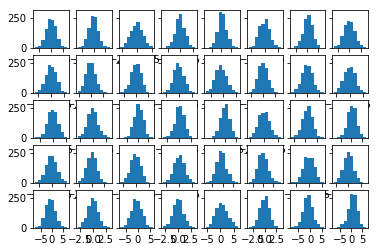

In [9]:
#Plotting histograms of entire dataset
fig,axes = plt.subplots(5, 8, sharey=True)
p = 0
for i in range(5):
    for j in range(8):
        axes[i,j].hist(np.ravel(train_[:][p]))
        p = p + 1
plt.show()

In [10]:
#Splitting to train and test
x_train, x_test, y_train, y_test = train_test_split(train_,train_Labels)

In [11]:
def plot(fpr,tpr,roc_auc):
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red',
     lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ##Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [11]:
### Building Logistic Regression
### Traning and testing using training data
logisticRegr = LogisticRegression(penalty='l1',C=0.67)
logit = logisticRegr.fit(x_train, np.ravel(y_train))
score = logit.score(x_test,y_test)
print("Prediction accuracy of training set",score*100,"\b%")
test = logit.predict(test_)

Prediction accuracy of training set 81.2 %


In [12]:
logit

LogisticRegression(C=0.67, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

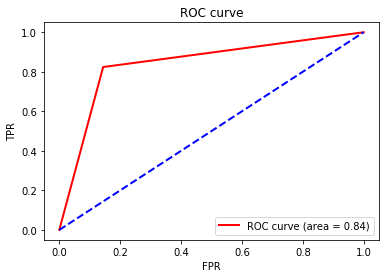

In [18]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(logit.predict(x_test),np.ravel(y_test))
roc_auc = roc_auc_score(logit.predict(x_test),np.ravel(y_test))
plot(fpr,tpr,roc_auc)

accuracy is 83.7 %


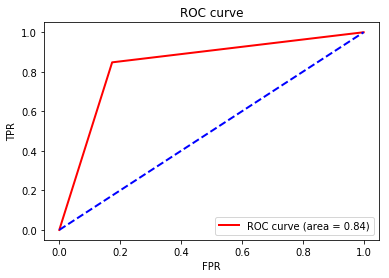

In [35]:
logit = logisticRegr.fit(train_, np.ravel(train_Labels))
check = logit.predict(train_)
fpr, tpr,_=roc_curve(logit.predict(train_),np.ravel(train_Labels),drop_intermediate=False)
print("accuracy is",logit.score(train_,np.ravel(train_Labels))*100,"\b%")
#print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test_lr = logit.predict(test_)
test = test_lr
roc_auc = roc_auc_score(logit.predict(train_),np.ravel(train_Labels))
#print(roc_auc)
#print(auc(fpr,tpr))

plot(fpr,tpr,roc_auc)
#plt.figure()
#plt.plot([0,1],[0,1])
#plt.show()

# SVM

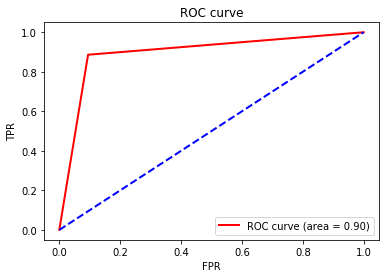

In [37]:
#training the training and testing on training data set
model = svm.SVC()
model.fit(x_train,np.ravel(y_train))
#print(model.score(x_test,y_test))
test = model.predict(test_)
sum(test)
##Computing false and true positive rates
fpr, tpr,_=roc_curve(model.predict(x_test),np.ravel(y_test))
roc_auc = roc_auc_score(model.predict(x_test),np.ravel(y_test))
plot(fpr,tpr,roc_auc)
#Accuracy 91%

accuracy is  99.8


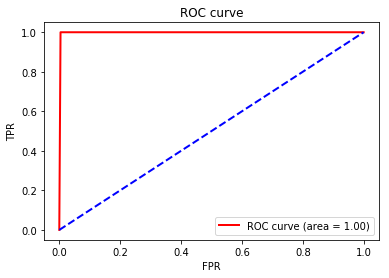

In [38]:
#training the training entire training dataset
model.fit(train_,np.ravel(train_Labels))
check = model.predict(train_)
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test = model.predict(test_)
test_svm = test
#Accuracy 91%
#sum(test)
fpr, tpr,_=roc_curve(model.predict(train_),np.ravel(train_Labels))
roc_auc = roc_auc_score(model.predict(train_),np.ravel(train_Labels))
plot(fpr,tpr,roc_auc)

# Random Forest

[ 0.01188197  0.0068781   0.01288828  0.008544    0.03850877  0.01464179
  0.06153123  0.02662532  0.00940096  0.01064097  0.00750561  0.01027943
  0.07396361  0.0170383   0.12281298  0.01814201  0.01097716  0.00937628
  0.04487559  0.01182286  0.01539826  0.01171379  0.02170389  0.0339552
  0.01519833  0.01431236  0.01096456  0.01068374  0.04598078  0.03943412
  0.01027537  0.00913037  0.04463232  0.0111964   0.03880691  0.01035449
  0.04871904  0.00986747  0.01461198  0.05472541]
0.86


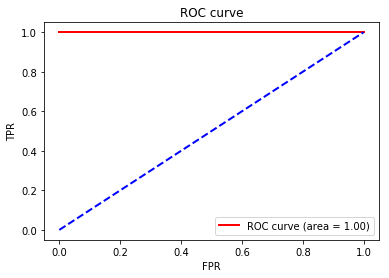

In [39]:
model_RF = RandomForestClassifier(n_estimators=17)
model_RF.fit(x_train,np.ravel(y_train))
print(model_RF.feature_importances_)
test = model.predict(test_)
print(model_RF.score(x_test,y_test))
#sum(test)
fpr, tpr,_=roc_curve(model.predict(x_test),np.ravel(y_test))
roc_auc = roc_auc_score(model.predict(x_test),np.ravel(y_test))
plot(fpr,tpr,roc_auc)

accuracy is  99.8


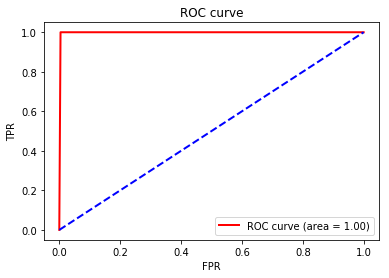

In [40]:
model_RF.fit(train_,np.ravel(train_Labels))
check = model.predict(train_)
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test = model.predict(test_)
test_rf = test
fpr, tpr,_=roc_curve(model.predict(train_),np.ravel(train_Labels))
roc_auc = roc_auc_score(model.predict(train_),np.ravel(train_Labels))
plot(fpr,tpr,roc_auc)

# Randomized Random Forest

In [326]:
for i in range(19):
    model_RF = RandomForestClassifier(n_estimators=i+1)
    model_RF.fit(x_train,np.ravel(y_train))
    #print(model_RF.feature_importances_)
    test = model.predict(test_)
    print(i+1,model_RF.score(x_test,y_test))
    #sum(test)
    #print(i)

1 0.724
2 0.728
3 0.78
4 0.788
5 0.82
6 0.824
7 0.86
8 0.876
9 0.824
10 0.86
11 0.848
12 0.868
13 0.86
14 0.9
15 0.884
16 0.876
17 0.876
18 0.892
19 0.88


# Neural Nets

In [327]:
model_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,2), random_state=1)
model_nn.fit(x_train,np.ravel(y_train))
check = model_nn.predict(x_test)
#test = model_nn.predict(test_)
print("accuracy is ",sum(check==np.ravel(y_test))*100/len(check))

accuracy is  91.2


In [328]:
model_nn.fit(train_,np.ravel(train_Labels))
check = model_nn.predict(train_)
#test = model_nn.predict(test_)
#print(train_[1:5])
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test = model_nn.predict(test_)
test_nn = test

accuracy is  97.3


# PCA

In [251]:
#Standardization
x_train_std = StandardScaler().fit_transform(x_train)
#taking first 36 components which account to 99% variability
pca = decomposition.PCA(n_components=35)
pcomps = pca.fit_transform(x_train_std)
#print(pca.explained_variance_)
print(pca.explained_variance_ratio_.sum())
#comps = pd.DataFrame(pca.components_)
comps = pd.DataFrame(pcomps)
comps.head()

0.980862907001


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-2.076352,3.029369,0.360578,-1.628585,-1.212840,2.160572,-0.884661,-0.230236,-0.764172,-1.820645,...,0.999883,0.654418,0.683006,-0.854058,0.295478,1.317596,-0.665012,-0.227013,0.835616,0.502493
1,1.431806,1.885572,0.492722,-0.616745,0.399596,0.691913,-0.139768,-0.978900,-1.908072,-0.233466,...,0.190796,1.597572,-0.547529,0.448212,-1.041492,-0.818109,-0.382931,2.092635,-0.387507,-0.815698
2,1.848852,-1.109818,-3.670023,-1.529740,0.670829,-0.916097,0.096431,-1.211271,-0.155356,0.162866,...,-0.922450,0.168725,0.680471,1.162826,-0.575886,0.197021,0.246470,0.550923,-0.075657,-0.611736
3,-1.526697,-0.200130,1.670015,-0.217175,1.320426,-3.724263,1.047987,-0.084067,-0.213780,0.302999,...,-0.955993,1.147834,0.110321,0.986280,0.429835,1.121872,-0.527394,0.329288,0.263753,-0.331701
4,-1.678938,1.008899,-1.527184,-0.504949,-0.482407,1.097843,-0.242906,-2.655839,1.089892,0.135146,...,-0.327107,-0.063799,-0.982568,1.570278,-1.117261,-0.334732,-0.159874,0.250556,0.145432,-0.993336


In [638]:
#training logistic model
logisticRegr = LogisticRegression(penalty='l1',C=0.67)
logit = logisticRegr.fit(comps, np.ravel(y_train))

x_test_std = StandardScaler().fit_transform(x_test)
#taking first 36 components which account to 99% variability
pca = decomposition.PCA(n_components=35)
pcomps = pd.DataFrame(pca.fit_transform(x_test_std))
#print(pca.explained_variance_)
score = logit.score(pcomps,y_test)
print("Prediction accuracy of training set",score*100)
#test = logit.predict(test_)

Prediction accuracy of training set 69.6


In [639]:
#Standardization
#training and testing
x_train_std = StandardScaler().fit_transform(x_train)
logisticRegr = LogisticRegression(penalty='l1',C=0.67)
logit = logisticRegr.fit(x_train_std, np.ravel(y_train))
x_test_std = StandardScaler().fit_transform(x_test)
print("accuracy of test set after trainin",logit.score(x_test_std,y_test)*100)

#training entire dataset
train_std = StandardScaler().fit_transform(train_)
logit = logisticRegr.fit(train_std, np.ravel(train_Labels))
check = logit.predict(train_std)
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))

test = logit.predict(StandardScaler().fit_transform(test_))

accuracy of test set after trainin 86.0
accuracy is  83.8


# Standardizing dataset

In [640]:
#Standardizing datasets
x_test_std = StandardScaler().fit_transform(x_test)
x_train_std = StandardScaler().fit_transform(x_train)
train_std = StandardScaler().fit_transform(train_) 
test_std = StandardScaler().fit_transform(test_)

# SVM

In [641]:
#training the training and testing on training data set
model = svm.SVC()
model.fit(x_train_std,np.ravel(y_train))
print(model.score(x_test_std,y_test)*100)
#test = model.predict(x_test_std)
#sum(x_test_std)
#Accuracy 91%

90.0


In [642]:
#training the training entire training dataset
model.fit(train_std,np.ravel(train_Labels))
check = model.predict(train_std)
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test = model.predict(test_std)
#Accuracy 91%

accuracy is  95.6


# Random Forest

In [644]:
model_RF = RandomForestClassifier(n_estimators=8)
model_RF.fit(x_train_std,np.ravel(y_train))
#print(model_RF.feature_importances_)
test = model.predict(x_test_std)
print(model_RF.score(x_test_std,y_test)*100)
#sum(test)

84.0


In [645]:
model_RF.fit(train_std,np.ravel(train_Labels))
check = model.predict(train_std)
print("accuracy is ",sum(check==np.ravel(train_Labels))*100/len(check))
test = model.predict(test_std)

accuracy is  95.6


In [308]:
# Standardization has reduced the accuracy

In [373]:
test = (test_lr + test_nn + test_svm + test_rf)/4
for i in range(len(test)):
    if test[i] >= 0.75:
        test[i] = 1
    else:
        test[i] = 0
#Best accuracy is less than SVM

In [374]:
# Lets try grid search and random search on random forest

In [411]:
from sklearn.cross_validation import cross_val_score
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rf = RandomForestClassifier()
grid_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=20).fit(x_train,np.ravel(y_train))
#grid_search_rf = GridSearchCV(rf, param_grid=param_dist, verbose=3,scoring='accuracy',cv=20).fit(x_train,np.ravel(y_train))

print ('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(np.asarray(x_train),np.ravel(y_train)))



best estimator RandomForest: RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Best Score 1.0


In [412]:
rf_best = grid_search_rf.best_estimator_
rf_best.fit(x_train,np.ravel(y_train))

print(rf_best.score(x_train,y_train))

1.0


In [413]:
print ('Score for Random Forest :',cross_val_score(rf_best,x_train,np.ravel(y_train),cv=10,scoring='accuracy').max())

Score for Random Forest : 0.906666666667


In [414]:
print(rf_best.score(x_test,y_test))
print ('Score for Random Forest :',cross_val_score(rf_best,x_test,np.ravel(y_test),cv=10,scoring='accuracy').max())

0.884
Score for Random Forest : 0.96


In [415]:
print ('Score for Random Forest :',cross_val_score(rf_best,train_,np.ravel(train_Labels),cv=10,scoring='accuracy').max())

Score for Random Forest : 0.88


In [416]:
rf_best.fit(train_,np.ravel(train_Labels))
print(rf_best.score(train_,np.ravel(train_Labels)))
test = rf_best.predict(test_)

1.0


In [418]:
# accuracy grid search is less than the original random forest algorithm

# KNN

In [422]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(2,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,np.ravel(y_train))
    print(i,model_knn.score(x_train,np.ravel(y_train)))

2 0.952
3 0.954666666667
4 0.946666666667
5 0.941333333333
6 0.929333333333
7 0.936
8 0.945333333333
9 0.917333333333
10 0.92
11 0.913333333333
12 0.912
13 0.898666666667
14 0.905333333333
15 0.893333333333
16 0.890666666667
17 0.892
18 0.889333333333
19 0.886666666667


In [423]:
for i in range(2,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,np.ravel(y_train))
    print(i,model_knn.score(x_test,np.ravel(y_test)))

2 0.896
3 0.916
4 0.896
5 0.916
6 0.916
7 0.912
8 0.932
9 0.924
10 0.928
11 0.92
12 0.932
13 0.932
14 0.94
15 0.94
16 0.932
17 0.932
18 0.924
19 0.908


In [424]:
for i in range(2,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(train_,np.ravel(train_Labels))
    print(i,model_knn.score(train_,np.ravel(train_Labels)))

2 0.956
3 0.957
4 0.964
5 0.945
6 0.938
7 0.934
8 0.936
9 0.929
10 0.929
11 0.927
12 0.929
13 0.921
14 0.925
15 0.915
16 0.916
17 0.913
18 0.911
19 0.905


In [440]:
model_knn = KNeighborsClassifier(n_neighbors=6)
model_knn.fit(train_,np.ravel(train_Labels))
test_knn = model_knn.predict(test_)
test = test_knn

In [450]:
#since best k value for knn is k = 6 let's try ensemble with 5 algorithms
test = (test_lr + test_nn + test_svm + test_rf + test_knn)/5
test[1:20]
for i in range(len(test)):
    if test[i] >= 0.8:
        test[i] = 1
    else:
        test[i] = 0

In [565]:
# Lets try gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=200)
model_gb.fit(x_train,np.ravel(y_train))
print("accuracy on train set",model_gb.score(x_train,np.ravel(y_train)))
print("accuracy on test set",model_gb.score(x_test,np.ravel(y_test)))

accuracy on train set 1.0
accuracy on test set 0.912


In [566]:
check = model_gb.predict_proba(x_test)
for i in range(len(check)):
    if check[i][1]>=0.50:
        check[i]=1
    else:
        check[i]=0
check = np.array(check).astype(int)
print("accuracy is ",sum(np.ravel(y_test)==np.ravel(check[:,1]))*100/len(x_test))

accuracy is  91.2


In [567]:
model_gb.fit(train_,np.ravel(train_Labels))
print("accuracy on train set",model_gb.score(x_train,np.ravel(y_train)))
print("accuracy on test set",model_gb.score(x_test,np.ravel(y_test)))
test = model.predict(test_)

accuracy on train set 1.0
accuracy on test set 1.0


In [5]:
#Standardizing datasets
x_test_std = StandardScaler().fit_transform(x_test)
x_train_std = StandardScaler().fit_transform(x_train)
train_std = StandardScaler().fit_transform(train_) 
test_std = StandardScaler().fit_transform(test_)

NameError: name 'x_test' is not defined

In [24]:
x_all = np.r_[x_train,x_test]
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [26]:
best_gmm.fit(x_all)
x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)

array([  1.26640839e-064,   3.81100404e-274,   6.92198366e-188,
         1.00000000e+000])

In [568]:
test = np.array(test).astype(int)
test_output = pd.DataFrame(test)
test_output.index = np.arange(1,len(test_output)+1)
test_output.index.name = 'Id'
test_output.to_csv('submission.csv',header=list(["Solution"]))

In [569]:
print("accuracy is ",sum(test_svm==np.ravel(test))*100/len(test))

accuracy is  97.6444444444


<h1> Using the code from following github <h1> <a href="https://github.com/siddharthagarwal/Kaggle-Data-Science-London-Scikit-Learn/blob/master/london.py">link</a>

In [12]:

#Checking the models

x_all = np.r_[x_train,x_test]

print('x_all shape :',x_all.shape)

x_all shape : (1000, 40)


In [17]:
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty

bic = []

n_components_range = range(1, 7)

cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:

	for n_components in n_components_range:

        # Fit a mixture of Gaussians with EM

		gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)

		gmm.fit(x_all)
		bic.append(gmm.aic(x_all))
		if bic[-1] < lowest_bic:
			lowest_bic = bic[-1]
			best_gmm = gmm
best_gmm.fit(x_all)

x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [37]:
model_RF = RandomForestClassifier()
model_RF.fit(np.r_[x_train,x_test],np.ravel(train_Labels))
#print(model_RF.feature_importances_)
test = model_RF.predict(x_test)
print(model_RF.score(x_test,y_test)*100)
#sum(test)

75.6
